#### Optimal Blending of Oil Crudes

In [4]:
using JuMP, Clp, Plots,Printf
using TestImages, Images, QuartzImageIO, ImageView

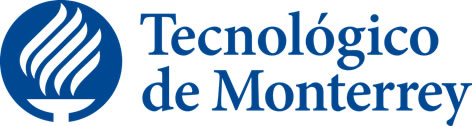

In [5]:
img = load("tec-logo.jpg")

In [297]:
crude_blending = Model(solver=ClpSolver());

In [298]:
price_c1        = 35    # Cost of crude 1  [$/bbl]
price_c2        = 25    # Cost of crude 2  [$/bbl]
price_c3        = 55    # Cost of crude 3  [$/bbl]

pc_c1           = 1.6     # Crude 1 processing cost [$/bbl]
pc_c2           = 1.4  # Crude 2 processing cost [$/bbl]
pc_c3           = 1.0  # Crude 3 processing cost [$/bbl]

price_gasoline  = 45 # Cost of gasoline [$/bbl]
price_kerosene  = 37 # Cost of kerosene [$/bbl]
price_jetfuel   = 30 # Cost of jetfuel  [$/bbl]
price_residual  = 18 # Cost of residual [$/bbl]

#Dgasoline = 75000 # Gasoline demand [bbl/day]
#Dkerosene = 10000 # Gasoline demand [bbl/day]
#Djetfuel  = 10000 # Gasoline demand [bbl/day]
#Dresidual = 5000 # Gasoline demand [bbl/day];

Dgasoline       = 35000 # Gasoline demand [bbl/day]
Dkerosene       = 7000  # Gasoline demand [bbl/day]
Djetfuel        = 10000 # Gasoline demand [bbl/day]
Dresidual       = 5000 # Gasoline demand [bbl/day];


In [299]:
@variable(crude_blending, bcrude1   >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bcrude2   >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bcrude3   >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bgasoline >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bkerosene >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bjetfuel  >= 0, start = 10000)  # [bbl/day]
@variable(crude_blending, bresidual >= 0, start = 10000)  # [bbl/day];

#### Amount of manufactured products [bbl/day]

In [300]:
@constraint(crude_blending, c1, bgasoline == 0.75bcrude1 + 0.50bcrude2 + 0.60*bcrude3)
@constraint(crude_blending, c2, bkerosene == 0.10bcrude1 + 0.15bcrude2 + 0.18*bcrude3)
@constraint(crude_blending, c3, bjetfuel  == 0.10bcrude1 + 0.25bcrude2 + 0.20*bcrude3)
@constraint(crude_blending, c4, bresidual == 0.05bcrude1 + 0.10bcrude2 + 0.12*bcrude3);

#### Meet products demand

In [301]:
@constraint(crude_blending, c5, bgasoline <= Dgasoline)
@constraint(crude_blending, c6, bkerosene <= Dkerosene)
@constraint(crude_blending, c7, bjetfuel  <= Djetfuel)
@constraint(crude_blending, c8, bresidual <= Dresidual);

#### Objective Function: Maximize Profits

In [302]:
@objective(crude_blending, Max, price_gasoline*bgasoline + price_kerosene*bkerosene + price_jetfuel*bjetfuel +
                           price_residual*bresidual - price_c1*bcrude1 - price_c2*bcrude2 - price_c3*bcrude3 - 
                           pc_c1*bcrude1 - pc_c2*bcrude2 - pc_c3*bcrude3);

In [303]:
status_crude_blending = solve(crude_blending)

:Optimal

In [304]:
println("Status of the problem is: ", status_crude_blending)
println("Objective function value [\$/day] = ", getobjectivevalue(crude_blending))
println("---------------------------------------")
println(" Raw Material [bbl/day]")
@printf " Crude No. 1: %f\n" getvalue(bcrude1)
@printf " Crude No. 2: %f\n" getvalue(bcrude2)
@printf " Crude No. 3: %f\n" getvalue(bcrude3)
println("---------------------------------------")
println(" Products [bbl/day]         Demand [bbl/day]")
@printf " Gasoline: %8.2f            %8.2f\n" getvalue(bgasoline)  Dgasoline
@printf " Keronese: %8.2f            %8.2f\n" getvalue(bkerosene)  Dkerosene
@printf " Jet Fuel: %8.2f            %8.2f\n" getvalue(bjetfuel)   Djetfuel
@printf " Residual: %8.2f            %8.2f\n" getvalue(bresidual)  Dresidual
println("---------------------------------------")


Status of the problem is: Optimal
Objective function value [$/day] = 447250.00000000023
---------------------------------------
 Raw Material [bbl/day]
 Crude No. 1: 25000.000000
 Crude No. 2: 30000.000000
 Crude No. 3: 0.000000
---------------------------------------
 Products [bbl/day]         Demand [bbl/day]
 Gasoline: 33750.00            35000.00
 Keronese:  7000.00             7000.00
 Jet Fuel: 10000.00            10000.00
 Residual:  4250.00             5000.00
---------------------------------------
